In [83]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Resources/05-Matplotlib_HW_Instructions_Pymaceuticals_data_Mouse_metadata.csv"
study_results = "Resources/05-Matplotlib_HW_Instructions_Pymaceuticals_data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [84]:
#Summary Statistics
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
#mean grouped by tumor volume
grouped_regimen = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
grouped_regimen

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Times Used')

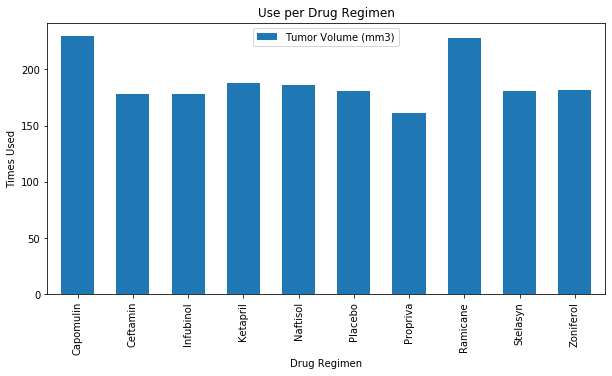

In [123]:
#Generate a bar plot using Pandas's DataFrame.plot() that shows the number of data points for each treatment regimen
grouped_regimen_datapoints = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count()
Tumor_Volume_Count_df = pd.DataFrame(grouped_regimen_datapoints)
Tumor_Volume_Count_df.plot(kind="bar", figsize = (10,5), width = 0.6)
plt.title("Use per Drug Regimen")
plt.ylabel("Times Used")

([<matplotlib.axis.XTick at 0x1a1bec6bd0>,
 <a list of 10 Text xticklabel objects>)

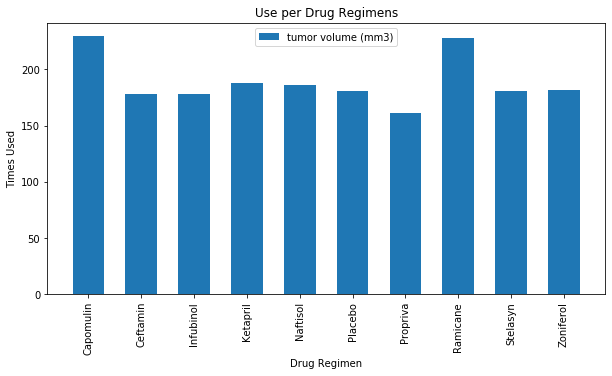

In [124]:
#Create a list of drug regimens in alphabetical order
drug_regimen = combined_data["Drug Regimen"].unique()
drug_regimen = list(drug_regimen)
drug_regimen.sort()

#Create x and y axis
x_axis = np.arange(0,len(drug_regimen), 1)
y_axis = Tumor_Volume_Count_df["Tumor Volume (mm3)"]

#Generate bar plot
plt.figure(figsize = (10,5))
plt.bar(x_axis, y_axis, width = 0.6, label = "tumor volume (mm3)")

#Add title and labels
plt.title("Use per Drug Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Times Used")
plt.legend(loc="upper center")


#Change x axis to the name of the drugs
tick_loactions = list(x_axis)
plt.xticks(tick_loactions, drug_regimen, rotation="vertical")